In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

from scipy.optimize import curve_fit
register_matplotlib_converters()

## About data

Data are taken from https://ourworldindata.org/coronavirus-source-data

In [171]:
'''
https://towardsdatascience.com/
covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d

Logistic function: f(x) = c / (1 + e^(-(x-b)/a))

a refers to the infection speed
b is the day with the maximum infections occurred
c is the total number of recorded infected people at the infection’s end
'''

def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

def exponential_model(x,a,b,c):
    return a*np.exp(b*(x-c))

In [47]:
table = pd.read_csv('owid-covid-data.csv', sep=',')

In [48]:
table_russia = table[table['location'] == 'Russia'].reset_index(drop=True)
table_russia['Time_series'] = pd.to_datetime(
    table_russia['date'], format='%Y-%m-%d', errors='ignore')
table_russia = table_russia.set_index('Time_series')

In [49]:
table_russia.tail()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
Time_series,,,,,,,,,,,,,,,,,,,,,
2020-05-24,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
2020-05-25,RUS,Russia,2020-05-25,344481,8599,3541,153,2360.519,58.924,24.264,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
2020-05-26,RUS,Russia,2020-05-26,353427,8946,3633,92,2421.820,61.301,24.895,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
2020-05-27,RUS,Russia,2020-05-27,362342,8915,3807,174,2482.909,61.089,26.087,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
2020-05-28,RUS,Russia,2020-05-28,370680,8338,3968,161,2540.044,57.135,27.190,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05


In [138]:
cut_data = table_russia[:'2020-05-12']

In [172]:
x = np.arange(cut_data.new_cases.size)
y = cut_data.new_cases

a = 5.24
b = 50
c = 11000

popt,pcov = curve_fit(logistic_model,x,y,p0=[a, b, c], maxfev=10000)
current_fit_log = logistic_model(x,*popt)
forecast_log = logistic_model(np.arange(table_russia.new_cases.size),*popt)

a = 1
b = 1
c = 1
popt,pcov = curve_fit(exponential_model,x,y,p0=[a, b, c], maxfev=10000)
current_fit_exp = exponential_model(x,*popt)
forecast_exp = exponential_model(np.arange(table_russia.new_cases.size),*popt)

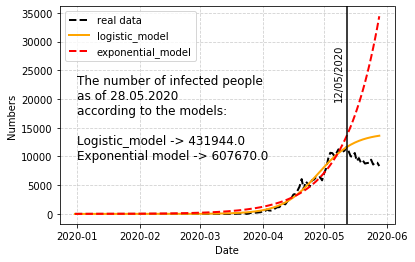

In [226]:
msg = (f'The number of infected people\nas of 28.05.2020\naccording to the models:\n\n'
      f'Logistic_model -> {round(forecast_log.sum(), 0)}\n'
      f'Exponential model -> {round(forecast_exp.sum(), 0)}\n')

plt.close()
plt.plot(table_russia.new_cases, ls='--', lw=2,label='real data', color='black')
plt.plot(table_russia.index, forecast_log, lw=2, label='logistic_model', color='orange')
plt.plot(table_russia.index, forecast_exp, ls='--', lw=2, label='exponential_model', color='red')
#plt.plot(cut_data.index, current_fit_log, lw=2, label='fitting', color='green')
plt.text('2020-05-06', 20000, '12/05/2020', rotation='vertical')
plt.text('2020-01-01', 7000, msg, fontsize=12)
plt.axvline('2020-05-12', color='black')
plt.ylabel('Numbers')
plt.xlabel('Date')
plt.grid(True, ls='--', alpha=0.6)
plt.legend()
plt.savefig('covid_modeling.png', format='png', dpi=700)

In [211]:
forecast_log.sum()

431944.27001826756

In [176]:
sum(forecast_exp)

607670.479716257

## Расчет для Италии

In [184]:
table_italia = table[table['location'] == 'Italy'].reset_index(drop=True)
table_italia['Time_series'] = pd.to_datetime(
    table_italia['date'], format='%Y-%m-%d', errors='ignore')
table_italia = table_italia.set_index('Time_series')

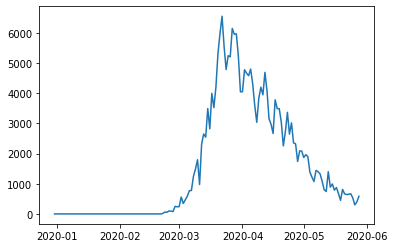

In [185]:
plt.plot(table_italia.new_cases)